In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('student-data.csv')

In [4]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [5]:
data.shape

(395, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [8]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [9]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [10]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [11]:
#as we can see there are no null values:

# Data Overview:

In [12]:
n_students = data.shape[0]
n_features = data.shape[1] - 1

passed = data.loc[data.passed == 'yes', 'passed']
n_passed = passed.shape[0]

failed = data.loc[data.passed == 'no', 'passed']
n_failed = failed.shape[0]

total = float(n_passed + n_failed)
grad_rate = float(n_passed * 100 / total)

print("Total number of students:{}".format(n_students))
print("Number of features:{}".format(n_features))
print("Number of students who passed:{}".format(n_passed))
print("Number of students who failed:{}".format(n_failed))
print("Graduation rate of the class:{:.2f}%".format(grad_rate))

Total number of students:395
Number of features:30
Number of students who passed:265
Number of students who failed:130
Graduation rate of the class:67.09%


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [14]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


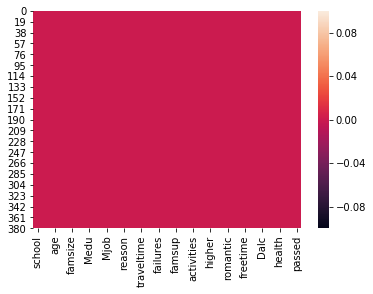

In [15]:
sns.heatmap(data.isnull())

In [16]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [17]:
#now we have to convert object type into numerical type:
#for that we use label encoder:

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','passed']
for val in list1:
    data[val]=le.fit_transform(data[val].astype(str))
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,0,5,5,4,4,5,4,11,0
391,1,1,17,1,1,1,3,1,3,3,...,1,0,2,4,5,3,4,2,3,1
392,1,1,21,0,0,1,1,1,2,2,...,0,0,5,5,3,3,3,3,3,0
393,1,1,18,0,1,1,3,2,3,2,...,1,0,4,4,1,3,4,5,0,1


In [19]:
data.dtypes

school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
traveltime    int64
studytime     int64
failures      int64
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
passed        int32
dtype: object

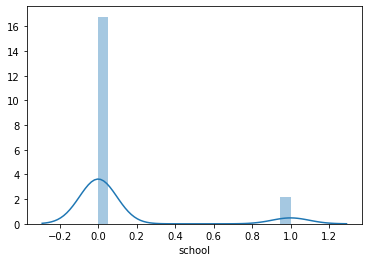

In [20]:
sns.distplot(data['school'])

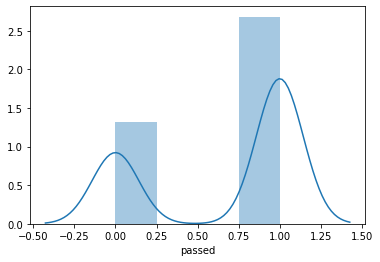

In [21]:
sns.distplot(data['passed'])

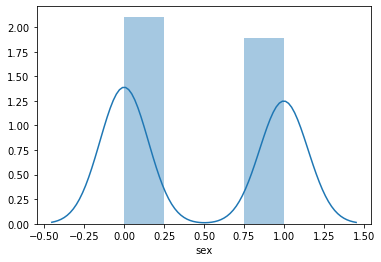

In [22]:
sns.distplot(data['sex'])

In [23]:
x=data.iloc[:,0:-1]
x.shape

(395, 30)

In [24]:
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,4


In [25]:
y=data.iloc[:,-1]
y.shape

(395,)

In [26]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: passed, dtype: int32

In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)   #to reduce the columns from 30 to 10

In [29]:
x=pca.fit_transform(x)
x.shape

(395, 10)

In [30]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,0.285746,-0.395244,-0.481066,0.526266,0.886969,-1.551492,0.228953,3.108343,-1.080882,-0.822402
1,-1.816955,0.911400,-3.106795,-0.675435,-0.153987,-1.143459,-1.039861,0.604578,-0.254104,-0.745571
2,4.242867,1.310135,-2.420091,-0.229388,-2.663751,0.270294,-0.183644,-1.089421,-0.527630,-0.053887
3,-3.785303,-1.895809,-0.647924,-1.895745,-1.195044,0.135661,0.868743,0.835807,0.851553,-0.004973
4,-1.769745,-0.903768,0.107616,-1.762618,-0.440624,0.229550,0.473147,0.463520,-0.146897,0.361743
...,...,...,...,...,...,...,...,...,...,...
390,5.449049,4.493535,1.784744,0.835090,2.632517,-0.092334,0.129895,-0.601669,-0.561908,-0.086254
391,-2.632639,2.568709,1.461623,2.136469,-0.245877,-1.839546,0.333699,-1.557944,0.820335,0.484569
392,-2.593565,4.626778,-1.260010,0.976193,3.723526,-0.320119,-0.110434,-1.007895,-1.656621,0.692379
393,-5.649913,2.190812,1.220825,-1.147670,1.151991,-0.249194,2.005332,-1.457687,-1.455963,0.993909


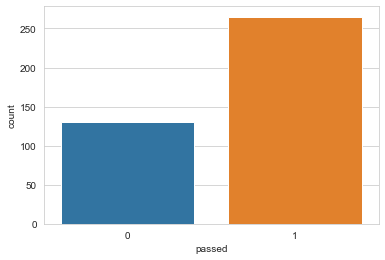

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='passed',data=data)

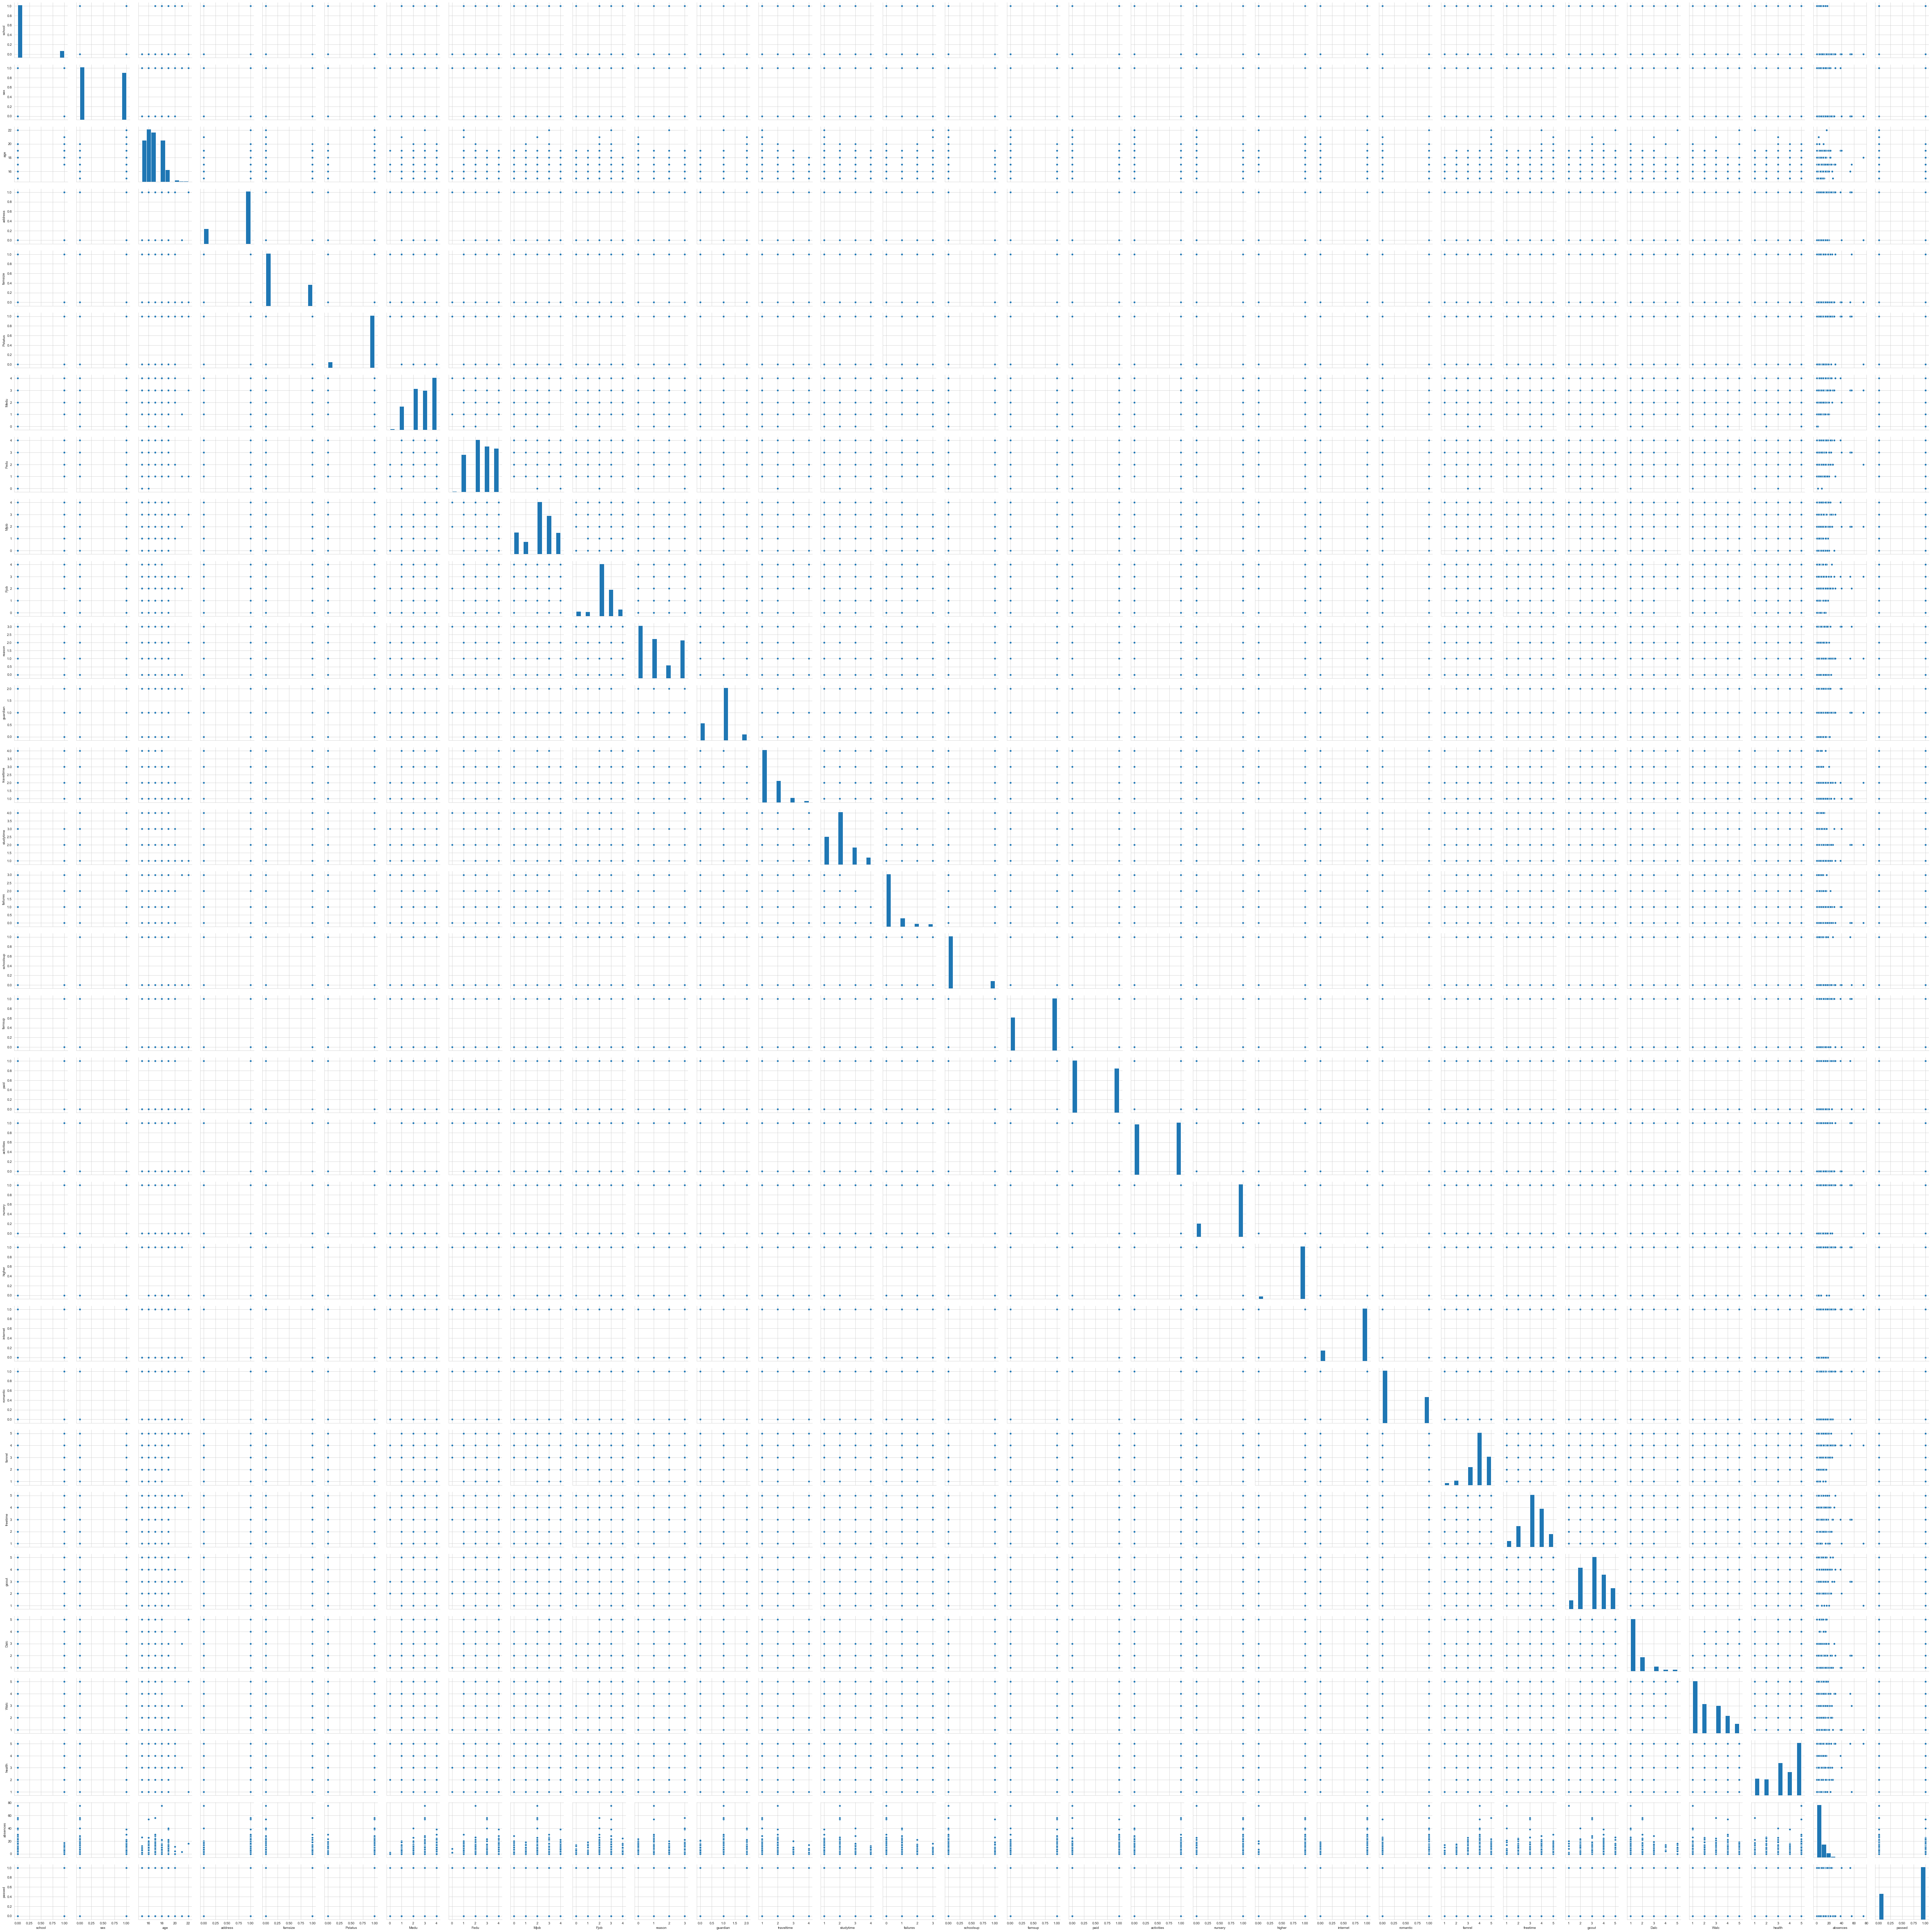

In [33]:
sns.pairplot(data)

In [34]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.3630498 , 0.94817639, 1.02304645, ..., 0.39928949, 0.03642446,
        1.42774701],
       [0.3630498 , 0.94817639, 0.23837976, ..., 0.39928949, 0.21379577,
        1.42774701],
       [0.3630498 , 0.94817639, 1.33095364, ..., 0.39928949, 0.53686493,
        0.7004042 ],
       ...,
       [2.75444305, 1.05465609, 3.37704655, ..., 0.39928949, 0.33890588,
        1.42774701],
       [2.75444305, 1.05465609, 1.02304645, ..., 1.04106985, 0.71423623,
        0.7004042 ],
       [2.75444305, 1.05465609, 1.80771315, ..., 1.04106985, 0.08868565,
        1.42774701]])

In [35]:
threshold=3
print(np.where(z>3))

(array([  2,  18,  25,  29,  61,  61,  66,  66,  74,  78,  78, 100, 108,
       108, 127, 127, 134, 144, 146, 148, 149, 149, 150, 150, 153, 153,
       157, 160, 163, 164, 164, 164, 165, 166, 173, 183, 184, 206, 207,
       223, 228, 236, 239, 247, 247, 247, 247, 250, 252, 269, 276, 276,
       280, 299, 307, 311, 315, 327, 327, 349, 350, 352, 357, 361, 371,
       375, 389, 392, 392], dtype=int64), array([14, 14, 23, 26, 12, 26, 23, 26, 29, 14, 20, 26, 12, 23, 14, 20, 12,
       14, 14, 20, 12, 14, 14, 20, 14, 20, 14, 20, 20, 12, 14, 20, 20, 20,
       14, 29, 23, 14, 23, 26, 12, 26, 20,  2, 14, 20, 26, 20, 20, 20, 20,
       29, 29, 23, 29, 20, 29, 12, 26, 26, 14, 20, 23, 20, 20, 12, 23,  2,
       14], dtype=int64))


In [36]:
z[2][14]

3.5893231630367843

In [37]:
z[18][14]

3.5893231630367843

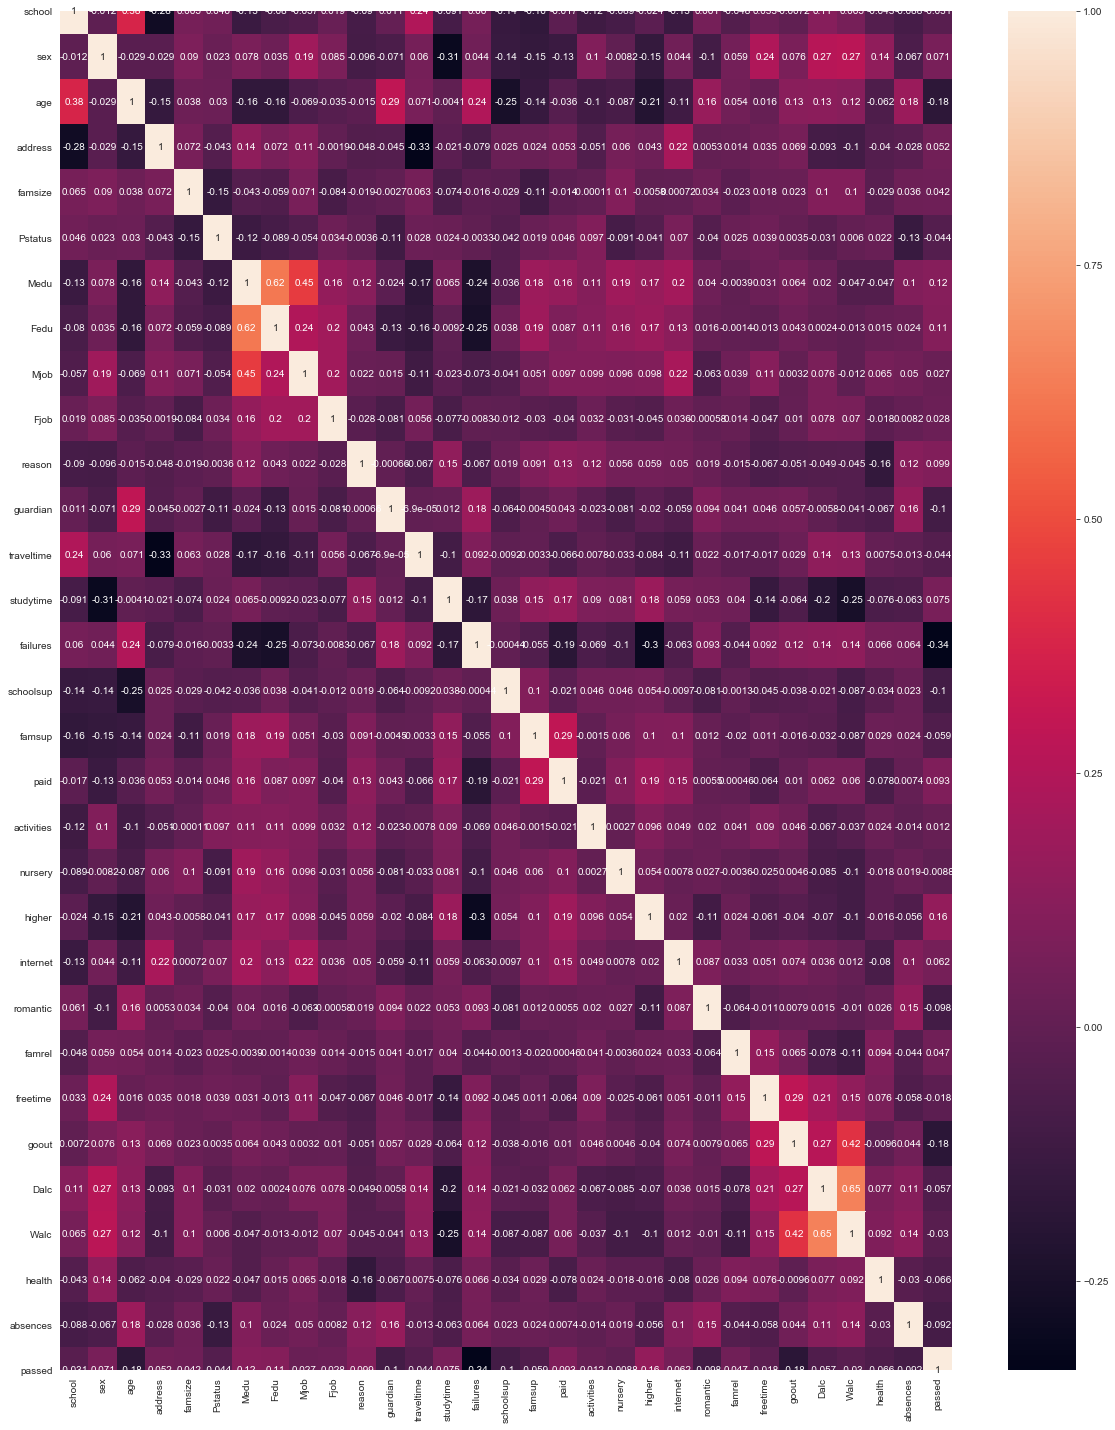

In [39]:
corr_hmap=data.corr()
plt.figure(figsize=(20,25))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [40]:
data_new=data[(z<3).all(axis=1)]

In [41]:
data_new

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,1
5,0,1,16,1,1,1,4,3,3,2,...,1,0,5,4,2,1,2,5,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1,0,18,1,1,1,3,1,4,3,...,1,0,4,3,4,1,1,1,0,0
390,1,1,20,1,1,0,2,2,3,3,...,0,0,5,5,4,4,5,4,11,0
391,1,1,17,1,1,1,3,1,3,3,...,1,0,2,4,5,3,4,2,3,1
393,1,1,18,0,1,1,3,2,3,2,...,1,0,4,4,1,3,4,5,0,1


In [42]:
data_new.shape

(342, 31)

In [43]:
data.shape

(395, 31)

In [44]:
data=data_new

In [45]:
data.shape

(342, 31)

In [46]:
#as we can see previously we have 395 rows now we are left with 342 rows only

# Training:

In [47]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=52)

In [85]:
x_train.shape

(264, 10)

In [86]:
y_train.shape

(264,)

In [87]:
x_test.shape

(131, 10)

In [88]:
y_test.shape

(131,)

In [89]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(pred,y_test))
print("confusion_matrix :",confusion_matrix(y_test,pred))

accuracy_score : 0.7175572519083969
confusion_matrix : [[10 29]
 [ 8 84]]


In [91]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

In [92]:
#or we can use function
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is :
0.7175572519083969
[[10 29]
 [ 8 84]]
              precision    recall  f1-score   support

           0       0.56      0.26      0.35        39
           1       0.74      0.91      0.82        92

    accuracy                           0.72       131
   macro avg       0.65      0.58      0.59       131
weighted avg       0.69      0.72      0.68       131



Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is :
0.6870229007633588
[[ 3 36]
 [ 5 87]]
              precision    recall  f1-score   support

           0       0.38      0.08      0.13        39
           1       0.71      0.95      0.81        92

    accuracy   

In [93]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf=RandomForestClassifier(n_estimators=200,random_state=47)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.6946564885496184
[[ 6 33]
 [ 7 85]]
              precision    recall  f1-score   support

           0       0.46      0.15      0.23        39
           1       0.72      0.92      0.81        92

    accuracy                           0.69       131
   macro avg       0.59      0.54      0.52       131
weighted avg       0.64      0.69      0.64       131

